### Importing libraries & functions





In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Importing dataset

In [3]:
dataset=pd.read_excel("C:\\Users\\KIIT\\Documents\\TTL project\\credit score classification\\credit_score_dataset.xlsx")

### Data preparation

In [4]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [5]:
#shows first few rows of the code
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [6]:
#dropping customer ID column from the dataset
dataset=dataset.drop('ID',axis=1)
dataset.shape

(3000, 29)

In [7]:
# explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [8]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [9]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [10]:
# # count of good loans (0) and bad loans (1)
dataset['TARGET'].value_counts()

TARGET
0    2500
1     500
Name: count, dtype: int64

In [11]:
# # data summary across 0 & 1
dataset.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


### Data Visualisation

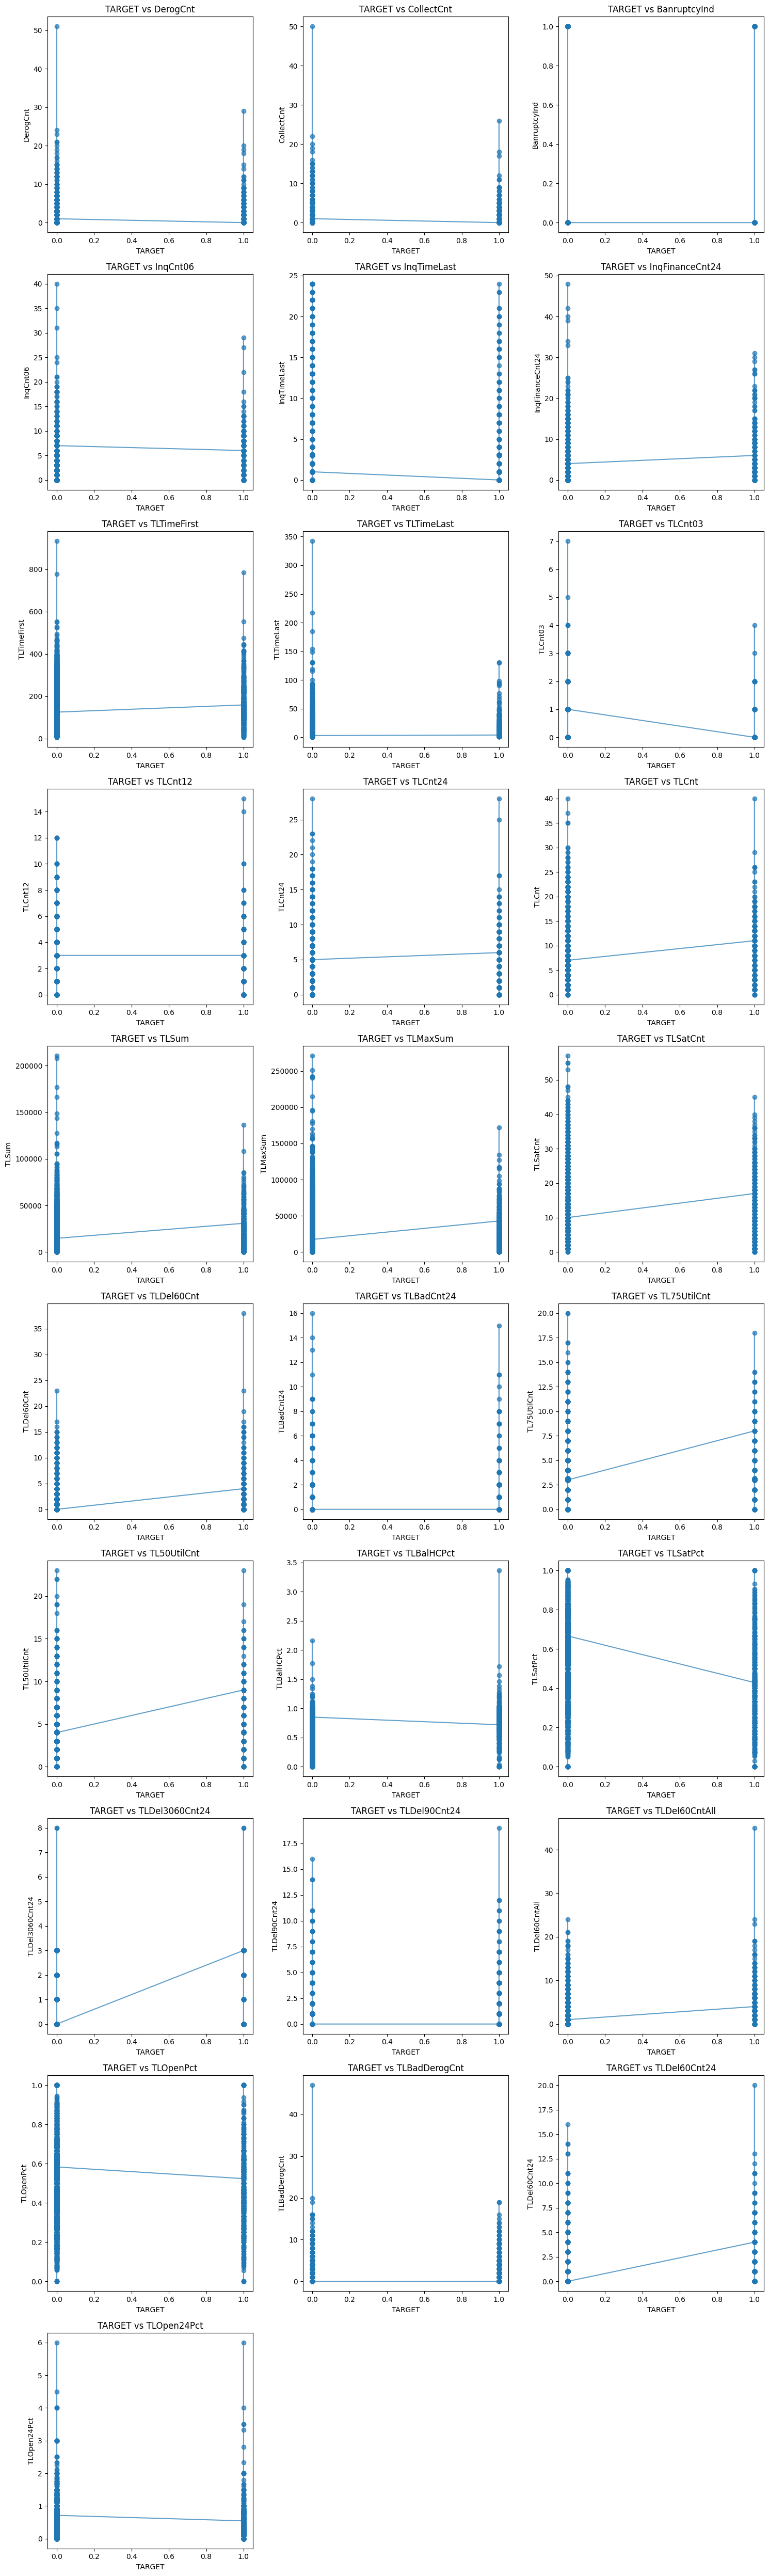

In [12]:
import matplotlib.pyplot as plt

# Define target and feature columns
target_column = 'TARGET'
feature_columns = [col for col in dataset.columns if col != target_column and col != 'ID']

# Set up the subplot grid size based on the number of features
num_features = len(feature_columns)
fig, axes = plt.subplots(nrows=num_features // 3 + 1, ncols=3, figsize=(15, 5 * (num_features // 3 + 1)))
axes = axes.flatten()

# Plot each feature against the target column
for i, feature in enumerate(feature_columns):
    axes[i].plot(dataset[target_column], dataset[feature], linestyle='-', marker='o', alpha=0.7)
    axes[i].set_title(f'{target_column} vs {feature}')
    axes[i].set_xlabel(target_column)
    axes[i].set_ylabel(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()

### Train Test Split

In [13]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [14]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Exporting Normalisation Coefficients for later use in prediction
import joblib
joblib.dump(sc, 'C:\\Users\\KIIT\\Documents\\TTL project\\credit score classification\\f2_Normalisation_CreditScoring')

['C:\\Users\\KIIT\\Documents\\TTL project\\credit score classification\\f2_Normalisation_CreditScoring']

### Risk Model building

In [17]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
# Exporting Logistic Regression Classifier for later use in prediction

# import joblib
joblib.dump(classifier, 'C:\\Users\\KIIT\\Documents\\TTL project\\credit score classification\\f1_Normalisation_CreditScoring')

['C:\\Users\\KIIT\\Documents\\TTL project\\credit score classification\\f1_Normalisation_CreditScoring']

### Model *performance*

In [19]:
print(confusion_matrix(y_test,y_pred))

[[487  13]
 [ 87  13]]


In [20]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


### Writing output file

In [21]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.61598311, 0.38401689],
       [0.98854759, 0.01145241],
       [0.87096661, 0.12903339],
       ...,
       [0.9445091 , 0.0554909 ],
       [0.46946796, 0.53053204],
       [0.94009714, 0.05990286]])

In [22]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("C:\\Users\\KIIT\\Documents\\TTL project\\credit score classification\\Model_Prediction.csv", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.615983,0.384017,0
1,0,0.988548,0.011452,0
2,1,0.870967,0.129033,0
3,0,0.954084,0.045916,0
4,1,0.726195,0.273805,0
